# CSC7442  
## Project #1    {Clustering} 

In [2]:
import pandas as pd
import numpy as np
import xlrd
from copy import deepcopy
import matplotlib.pyplot as plt
import statistics
import math

## Import and plot dataset

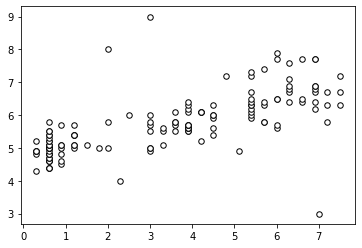

In [3]:
workbook = xlrd.open_workbook('PROJECT#1_clusterdata.xls')
sheet = workbook.sheet_by_index(0)

f1 = [sheet.cell_value(i, 0) for i in range(sheet.nrows)]
f2 = [sheet.cell_value(i, 1) for i in range(sheet.nrows)]

X = np.array(list(zip(f1, f2)))
    
plt.scatter(X[:,0],X[:,1],c='white', marker='o',edgecolor='black',s=30)

## 1. For K-means method

In [4]:
from sklearn.cluster import KMeans

### 1.1 Use KMeans and predict, num_cluster = 3

In [5]:
number_of_clusters=4

km = KMeans(
    n_clusters=number_of_clusters, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(X)

centroids = km.cluster_centers_
labels = km.labels_

### 1.2 Calculate distortion (or SSE) for a range of number of cluster -- Elbow method

86.63463616146063


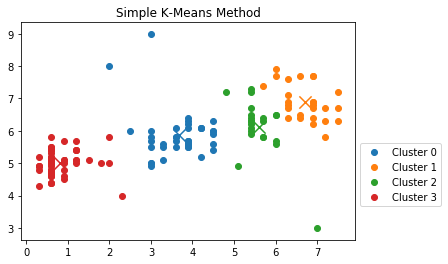

In [6]:
total_dist = number_of_clusters*[0]
clusters = []

for i in range(number_of_clusters):
    #print(i)
    clusters.append(X[labels==i])
    
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        total_dist[i]+=(np.linalg.norm(clusters[i][j]-centroids[i], axis=0))
        
SSE = sum(total_dist)
print(SSE)
# print(clusters)

# plot
# colors = ["g.","r.","c.","k.","y.","k.","w.","b."]     

fig, ax = plt.subplots()       
ax.set_title('Simple K-Means Method', color='black')          
for i in range(len(clusters)):           
    label="Cluster "+str(i)      
    C='C'+str(i)    
    for j in range(len(clusters[i])):        
        # plt.plot(clusters[i][j][0], clusters[i][j][1],colors[New_labels[i]],markersize=10) 
        if j==0:   
            ax.scatter(clusters[i][j][0], clusters[i][j][1],c=C,label=label)      
        else:
            ax.scatter(clusters[i][j][0], clusters[i][j][1],c=C)         
    ax.scatter(centroids[i][0], centroids[i][1],c=C, marker = "x", s=150, linewidths = 5, zorder =10)
legend=ax.legend(loc="center left", shadow=False, fontsize=10,bbox_to_anchor=(1, 0.3))

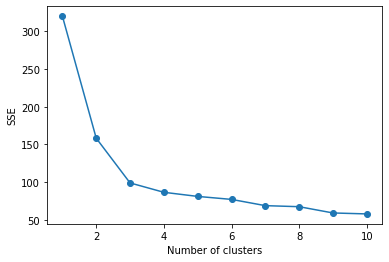

In [7]:
SSE = [319.918, 158.28, 99.049,86.63, 81.178, 77.223, 68.942, 67.556, 59.249, 57.986]
# plot
plt.plot(range(1, 11),SSE , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

## 2. For Bisecting of clustering method
###     2.1 Algorithm of Bisecting clustering method:
       1. Start with all the examples in a single cluster.
       2. Choose the best cluster for splitting (e.g. the largest local SSE).
       3. Split the best candidate with k-means, using k = 2.
       4. Repeat steps 2 and 3 until the desired number of clusters is reached.

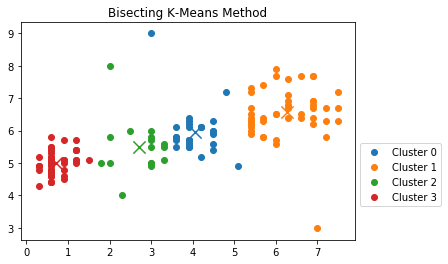

In [8]:
number_of_clusters=4
cluster_ID = 0
clusters = []
New_labels = []
centroids_list = []

# repeat using KMeans method with k = 2
while cluster_ID +2 <= number_of_clusters: 
    km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(X)
    centroids = km.cluster_centers_
    labels = km.labels_
    #append all clusters and centroids to each list
    clusters.append(X[labels==0])
    clusters.append(X[labels==1])
    centroids_list.append(centroids[0])
    centroids_list.append(centroids[1])  
    #if the last two clusters, directly append their cluster_ID to New_labels list. If not, loop into IF and
    # choose the cluster for split from clusters list, pop that cluster and its centroid 
    total_dist=number_of_clusters*[0]
    for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            total_dist[i]+=(np.linalg.norm(clusters[i][j]-centroids_list[i], axis=0))   
    if cluster_ID+2!=number_of_clusters:
        max_dist=max(total_dist)
        max_index=total_dist.index(max_dist)
        X= clusters[max_index]
        clusters.pop(max_index)
        centroids_list.pop(max_index)
    
    New_labels.append(cluster_ID)
    
    cluster_ID += 1
    if cluster_ID+1==number_of_clusters:
        New_labels.append(cluster_ID)

# plot 

#colors = ["g.","r.","c.","k.","y.","k.","w.","b."]
fig, ax = plt.subplots()
ax.set_title('Bisecting K-Means Method', color='black')
for i in range(len(clusters)): 
    label="Cluster "+str(i)
    C='C'+str(i)    
    for j in range(len(clusters[i])):         
        if j==0:
            ax.scatter(clusters[i][j][0], clusters[i][j][1],c=C,label=label)
        else:
            ax.scatter(clusters[i][j][0], clusters[i][j][1],c=C) 
    ax.scatter(centroids_list[i][0], centroids_list[i][1],c=C, marker = "x", s=150, linewidths = 5, zorder =10)
legend=ax.legend(loc="center left", shadow=False, fontsize=10,bbox_to_anchor=(1, 0.3))

### 2.2 Calculate SSE for a certain number of clusters

#### Using Elbow method, plot global SSE as a function of increasing number of clusters from 1 to 10. 
1. First, calculate SSE with 1 clusters using KMeans, which is already calculated in Section 1.2.
2. Then, calculate global SSE with the number of clusters from 1 to 10, using sum(total_dist) below.
3.  Plot Elbow method, showing number of clusters = 2 is best among many options.

In [9]:
# sum of all local total_dist from each clusters to be one global SSE, changing num_cluster
sum(total_dist)

91.5470653290945

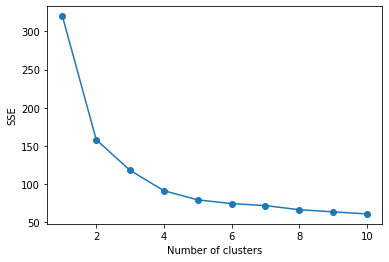

In [10]:
# give a list of local distortions based on the bisecting clustering method above, then plot distortions vs 
# num_clusters. The distortions list refers to num_clusters = [1,2,3,4,5,6,7,8,9,10], 
# e.g. num_clusters = 2, SSE = 158.28

SSE = [319.918, 158.28, 118.156, 91.547, 79.549, 74.647, 72.073, 66.662, 63.849, 61.143]
# plot
plt.plot(range(1, 11), SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

## 3. Dispersing of clusters
###     3.1 Algorithm of dispersing cluster method:
1. Determine the cluster to disperse by dispersing each cluster and compare the global SSE, choose the one causes the smallest global SSE, to disperse, assign the data points to the nearest cluster centroid, update centroids.
2. Repeat Step 1 for 3 times (because started K+3 to get K clusters)

In [11]:
#workbook = xlrd.open_workbook('PROJECT#1_clusterdata.xls')
#sheet = workbook.sheet_by_index(0)

#f1 = [sheet.cell_value(i, 0) for i in range(sheet.nrows)]
#f2 = [sheet.cell_value(i, 1) for i in range(sheet.nrows)]

X = np.array(list(zip(f1, f2)))

# split to k+3 clusters, use KMeans
num_clusters = 4
km = KMeans(
    n_clusters=num_clusters + 3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit_predict(X)
centroids_list = km.cluster_centers_
labels = km.labels_
#append all clusters and centroids to each list
clusters=[]
for i in range(num_clusters+3):
    clusters.append(X[labels==i])
    
# disperse one cluster at one time, see which case is the smallest global SSE 
#Min_SSE=float('inf')
final_disperse=[]
dispersed_cluster= -1
final_clusters=[]
final_centroids_list=[]
# loop 3 times, each time the number of clusters reduces 1
for K in range(3):
    #print(len(clusters),K)
    Min_SSE=float('inf')
    SSE = len(clusters)*[0]
    for i in range(len(clusters)):
        disperse=[0]*len(clusters[i])         # destination holder of dispersed points
        for j in range(len(clusters[i])):
            min_dist=float('inf')
            for k in range(len(clusters)):  
                tmp_dist=np.linalg.norm(clusters[i][j]-centroids_list[k], axis=0) 
                if k!=i and min_dist>tmp_dist:
                    min_dist= tmp_dist        # find the smallest distance/SSE
                    disperse[j] = k           # store the dispered point destination
   
        tmp_clusters=clusters[:]
        tmp_centroids_list=[]
        for j in range(len(disperse)):
            # append dispersed points to destination cluster
            tmp_clusters[disperse[j]]=np.vstack((tmp_clusters[disperse[j]], tmp_clusters[i][j])) 
        tmp_clusters.pop(i)
        for j in range(len(tmp_clusters)):        
            # After assignments of dispersed points, update the centroids of all clusters 
            tmp_x=0
            tmp_y=0
            for k in range(len(tmp_clusters[j])):    
                tmp_x+=tmp_clusters[j][k][0]
                tmp_y+=tmp_clusters[j][k][1]
            tmp_c_x=tmp_x/len(tmp_clusters[j])
            tmp_c_y=tmp_y/len(tmp_clusters[j])
            tmp_centroids_list.append((tmp_c_x,tmp_c_y))
        for j in range(len(tmp_clusters)):
            for k in range(len(tmp_clusters[j])):
                SSE[i]+=np.linalg.norm(tmp_clusters[j][k]-tmp_centroids_list[j], axis=0)
        if Min_SSE>SSE[i]:
            Min_SSE=SSE[i]
            final_disperse=disperse[:]
            dispersed_cluster=i
            final_clusters=tmp_clusters[:]
            final_centroids_list=tmp_centroids_list[:]
    clusters=final_clusters[:]
    centroids_list=final_centroids_list[:]

# In this method, the Global SSE should extract Min_SSE
print(Min_SSE)
                    

86.43211157539228


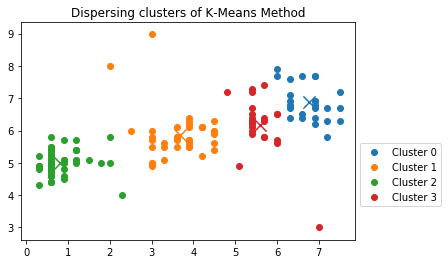

In [12]:
# plot 

#colors = ["g.","r.","c.","k.","y.","k.","w.","b."]
fig, ax = plt.subplots()
ax.set_title('Dispersing clusters of K-Means Method', color='black')
#count=0
for i in range(len(clusters)): 
    label="Cluster "+str(i)
    C='C'+str(i)    
    for j in range(len(clusters[i])):   
        #count+=1
        if j==0:
            ax.scatter(clusters[i][j][0], clusters[i][j][1],c=C,label=label)
        else:
            ax.scatter(clusters[i][j][0], clusters[i][j][1],c=C) 
    ax.scatter(centroids_list[i][0], centroids_list[i][1],c=C, marker = "x", s=150, linewidths = 5, zorder =10)
legend=ax.legend(loc="center left", shadow=False, fontsize=10,bbox_to_anchor=(1, 0.3))
#print(count)

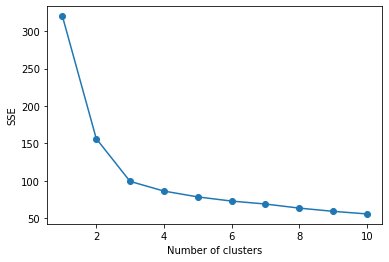

In [13]:
# The distortions list refers to num_clusters = [1,2,3,4,5,6,7,8,9,10], 


SSE = [319.918, 156.5, 99.374, 86.432, 78.636, 73.074, 69.130, 63.6816, 59.38, 55.909]
# plot
plt.plot(range(1, 11), SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()